In [1]:
from model import Fitness

# Data visualization tools.
import seaborn as sns
import seaborn.objects as so
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import altair as alt
alt.data_transformers.enable("vegafusion")
alt.renderers.enable("jupyter")

RendererRegistry.enable('jupyter')

In [2]:
modelNone = Fitness(200, 20, 20, abundance=0.25, mutation=False, choosy=False)
modelC = Fitness(200, 20, 20, abundance=0.25, mutation=False, choosy=True)
modelM = Fitness(200, 20, 20, abundance=0.25, mutation=True, choosy=False)
modelMC = Fitness(200, 20, 20, abundance=0.25, mutation=True, choosy=True)

for _ in range(10000):
    modelNone.step()
    modelC.step()
    modelM.step()
    modelMC.step()

modelNone_data = modelNone.datacollector.get_model_vars_dataframe()
modelNone_agent_data = modelNone.datacollector.get_agent_vars_dataframe()

modelC_data = modelC.datacollector.get_model_vars_dataframe()
modelC_agent_data = modelC.datacollector.get_agent_vars_dataframe()

modelM_data = modelM.datacollector.get_model_vars_dataframe()
modelM_agent_data = modelM.datacollector.get_agent_vars_dataframe()

modelMC_data = modelMC.datacollector.get_model_vars_dataframe()
modelMC_agent_data = modelMC.datacollector.get_agent_vars_dataframe()

In [3]:
# print(agent_data)

# agent_data.to_csv('agent_data_output.csv')

In [4]:
model_names = ["No Mutation No Choice", "Choice", "Mutation", "Mutation Choice"]
models = [modelNone_data, modelC_data, modelM_data, modelMC_data]

for i, model in enumerate(models):
    model.index.rename('step', inplace=True)
    model.reset_index(inplace=True)
    models[i] = model.assign(model_type=model_names[i])

In [5]:
for model in models:
    print(model.loc[0])

step                               0
Avg Fitness                -0.047556
Population                       200
Carriers                         100
Givers                           100
model_type     No Mutation No Choice
Name: 0, dtype: object
step                  0
Avg Fitness    0.006618
Population          200
Carriers            100
Givers              100
model_type       Choice
Name: 0, dtype: object
step                  0
Avg Fitness   -0.037423
Population          200
Carriers            100
Givers              100
model_type     Mutation
Name: 0, dtype: object
step                         0
Avg Fitness           0.015709
Population                 200
Carriers                   100
Givers                     100
model_type     Mutation Choice
Name: 0, dtype: object


In [6]:
model_data_full = pd.concat(models).reset_index()
model_data_full

,index,step,Avg Fitness,Population,Carriers,Givers,model_type
0,0,0,-0.047556,200,100,100,No Mutation No Choice
1,1,1,-0.047556,200,100,100,No Mutation No Choice
2,2,2,-0.047556,200,100,100,No Mutation No Choice
3,3,3,-0.047556,200,100,100,No Mutation No Choice
4,4,4,-0.047556,200,100,100,No Mutation No Choice
...,...,...,...,...,...,...,...
19999,4996,4996,2.675973,1713,806,907,Mutation Choice
20000,4997,4997,2.675968,1714,807,907,Mutation Choice
20001,4998,4998,2.676085,1715,808,907,Mutation Choice
20002,4999,4999,2.673586,1714,809,905,Mutation Choice


<Axes: xlabel='step', ylabel='Avg Fitness'>

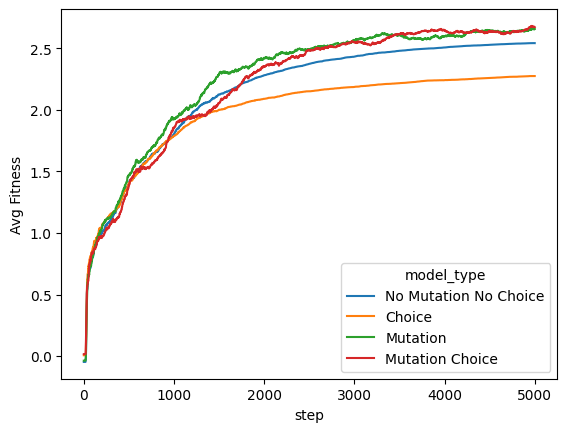

In [7]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="Avg Fitness",
    hue="model_type"
)


<Axes: xlabel='step', ylabel='Population'>

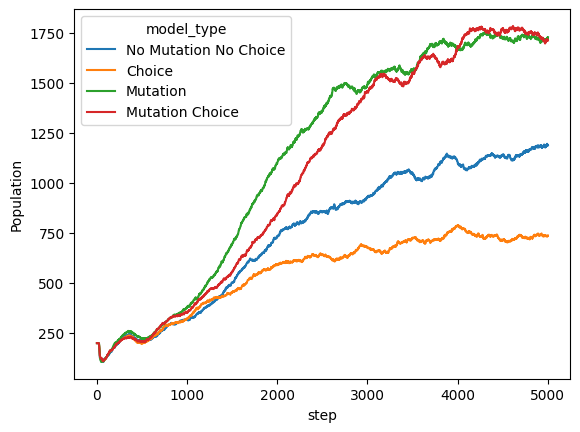

In [8]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="Population",
    hue="model_type"
)

<Axes: xlabel='step', ylabel='Carriers'>

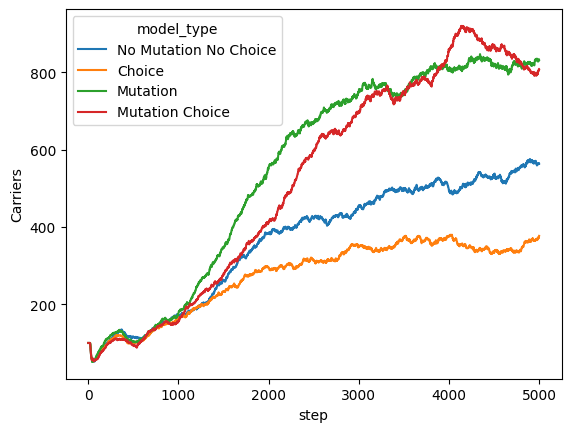

In [9]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="Carriers",
    hue="model_type"
)

<Axes: xlabel='step', ylabel='Givers'>

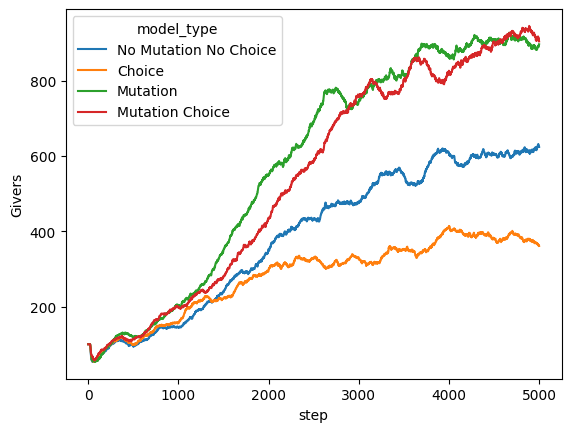

In [10]:
sns.lineplot(
    data=model_data_full,
    x="step",
    y="Givers",
    hue="model_type"
)

In [11]:
agent_data = [modelNone_agent_data, modelC_agent_data, modelM_agent_data, modelMC_agent_data]
time_points = [0, 2000, 5000]

for data in agent_data:
    for point in time_points:
        plot = alt.Chart(data.loc[point, ["Fitness", "Role"]]).mark_bar(
            opacity=0.5,
            binSpacing=0
        ).encode(
            alt.X("Fitness:Q").bin(maxbins=20),
            alt.Y('count()').stack(None),
            color='Role:N'
        )